<a href="https://colab.research.google.com/github/cassianovello/mvp_02/blob/main/DataScience_MVP_02_parte01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## MPV - Sprint Machine Learning (Parte 01 - Métodos Clássicos)
**Cássia Francine Novello**

O dataset selecionado contém informações médicas sobre pacientes. Eles foram classificados por médicos especialistas como alto/baixo risco para ataque cardíaco.

O propósito deste trabalho é realizar a classificação de pacientes usando métodos clássicos de inteligência artificial, de acordo com suas informações médicas, reduzindo a dependência de especialistas para uma avaliação prévia.



Segue a descrição dos atributos:

Age : Idade do paciente

Sex : Sexo do paciente (0 = feminino  1 = masculino)

exang: angina induzida por exercício (1 = sim; 0 = não)

ca: número dos maiores vasos sanguíneos (0-3)

cp : Tipo de dor no peito
* Valor 1: angina típica
* Valor 2: angina atípica
* Valor 3: dor não decorrente de agina
* Valor 4: assintomático

trtbps : pressão sanguínea em repouso (em mm Hg)

chol : colesterol em mg/dl via BMI sensor

fbs : (açucar no sangue em jejum > 120 mg/dl) (1 = verdadeiro; 0 = falso)

rest_ecg : resultados electrocardiograficos em repouso
* Valor 0: normal
*Valor 1: curvas anormais (T wave inversions and/or ST elevation or depression of > 0.05 mV)
* Valor 2: provável ou definida hipertrofia ventricular esquerda pelo critério Estes

oldpeak : alteração numérica induzida por descanso após pico do exercício no ECG

slp : variação no pico do exercício no ECG
* 0 = variação para cima
* 1 = não varia
* 2 = variação para baixo

thall :  talassemia encontrada
* 0 = sem informação
* 1 = anomalia fixa
* 2 = normal
* 3 = anomalia reversível

thalach: máximo de batimentos cardíacos

target :
* 0= menor chance de ataque cardíaco
* 1= maior chance de ataque cardíaco

Conceitos:

* Angina de peito (angina pectoris) é a descrição utilizada para caracterizar a dor torácica causada pela falta de sangue (isquemia) que acomete o músculo cardíaco.

* Talassemia: é uma patologia hereditária sanguínea caracterizada pelo índice de hemoglobinas abaixo do normal.

Para mais informações, aqui está o link para o dataset original no Kaggle:

https://www.kaggle.com/datasets/rashikrahmanpritom/heart-attack-analysis-prediction-dataset?resource=download

## 1. Importação e análise dos dados

In [ ]:
# Importação de pacotes
import pandas as pd
import seaborn as sns

from sklearn.model_selection import train_test_split # para particionar em bases de treino e teste (holdout)
from sklearn.model_selection import KFold # para preparar os folds da validação cruzada
from sklearn.model_selection import cross_val_score # para executar a validação cruzada
from sklearn.metrics import accuracy_score # para a exibição da acurácia do modelo
from sklearn.neighbors import KNeighborsClassifier # algoritmo KNN
from sklearn.tree import DecisionTreeClassifier # algoritmo Árvore de Classificação
from sklearn.naive_bayes import GaussianNB # algoritmo Naive Bayes
from sklearn.svm import SVC # algoritmo SVM

from sklearn.metrics import confusion_matrix , precision_recall_curve , roc_auc_score , roc_curve,  classification_report
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

import numpy as np
import matplotlib.pyplot as plt

from sklearn.feature_selection import f_classif # para o teste ANOVA da Seleção Univariada
from sklearn.feature_selection import SelectKBest # para a Seleção Univariada

from sklearn.pipeline import Pipeline




Importação do dataset

In [ ]:
url_dados = 'https://raw.githubusercontent.com/cassianovello/mvp_02/8d90f3b511d525dcc09a3e237bc7852d68bbb21a/heart.csv'

df = pd.read_csv(url_dados,sep=',')
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


Avaliação de valores faltantes:

In [ ]:
df.isna().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

In [ ]:
print(df.shape)
df.info()

(303, 14)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


Análise de distribuição das entradas:

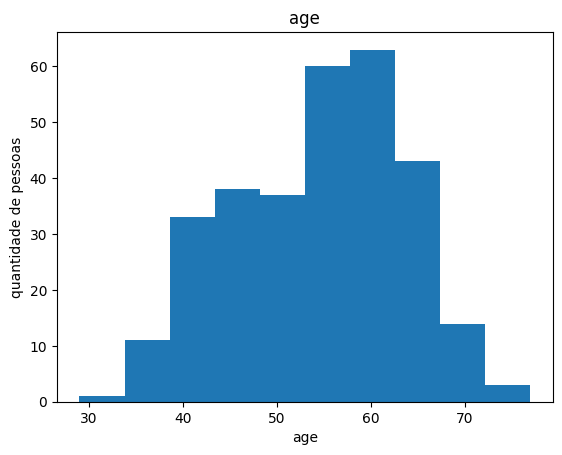

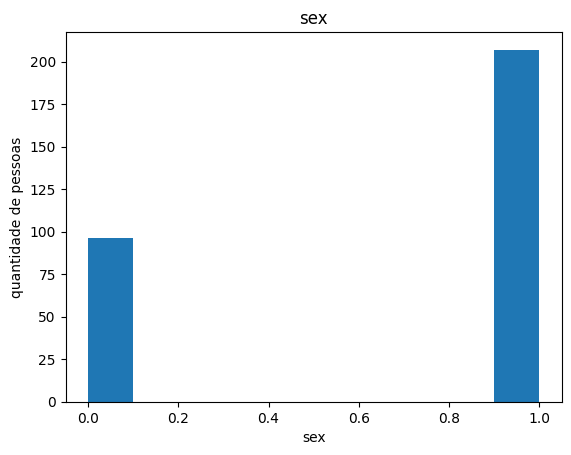

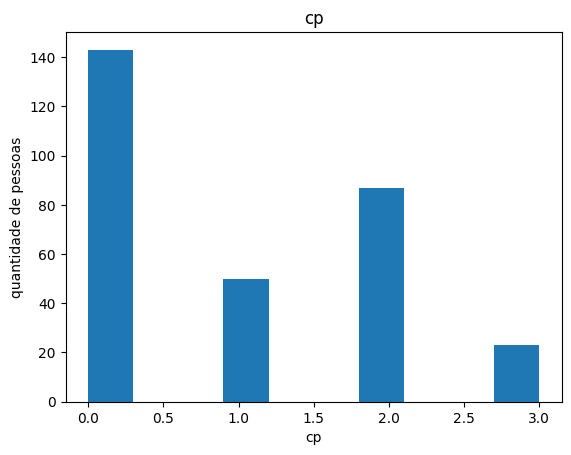

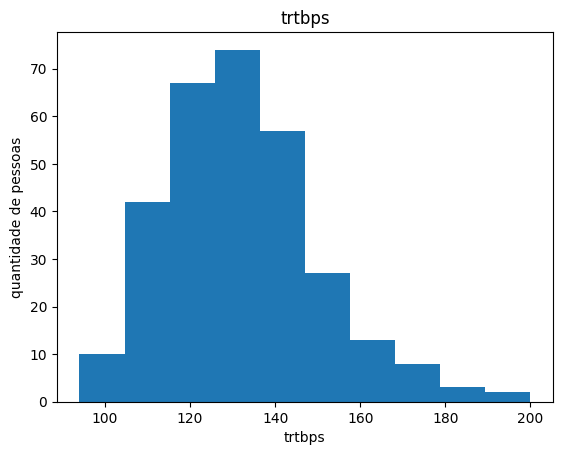

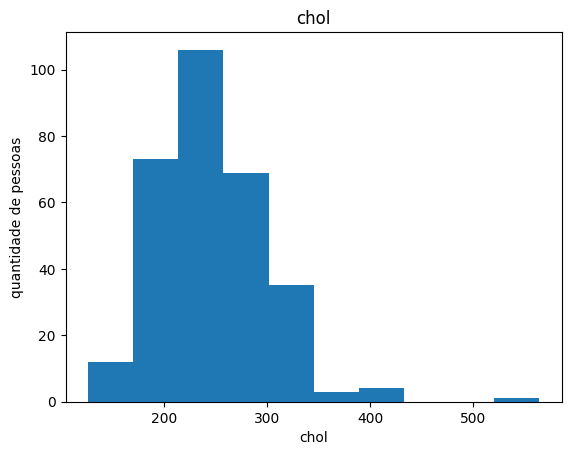

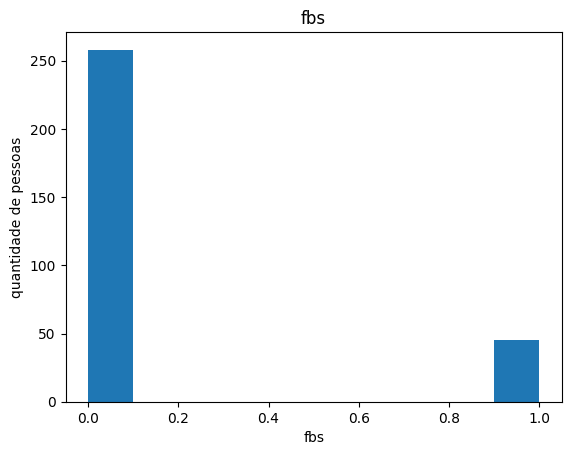

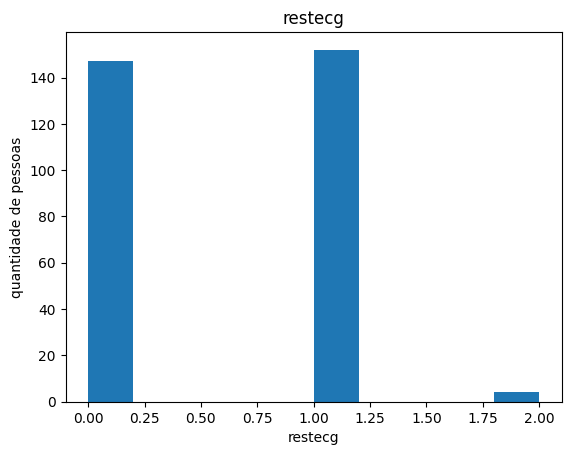

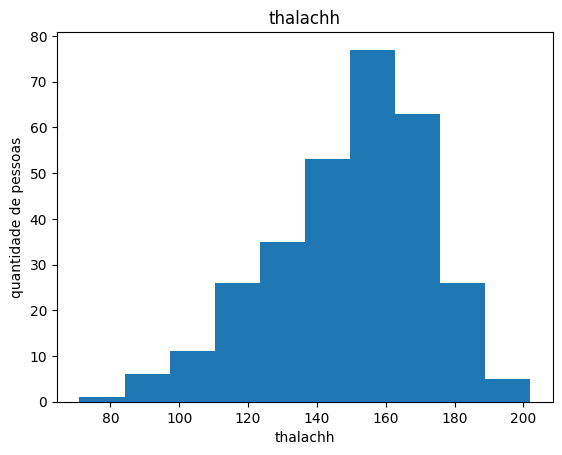

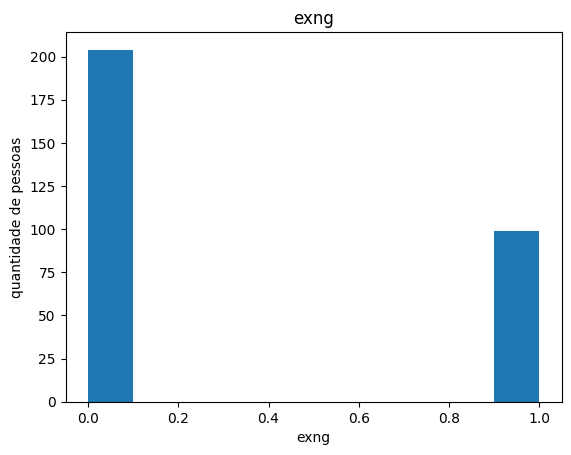

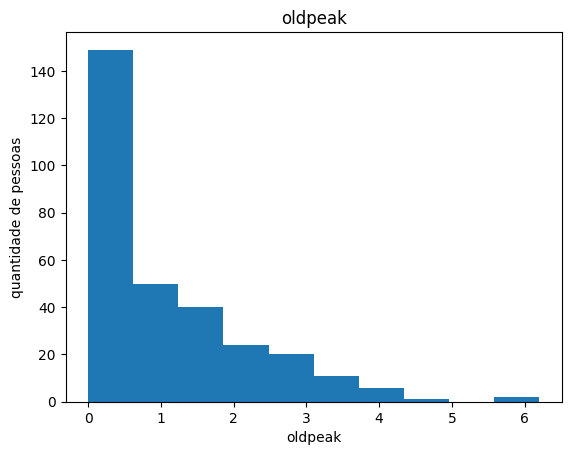

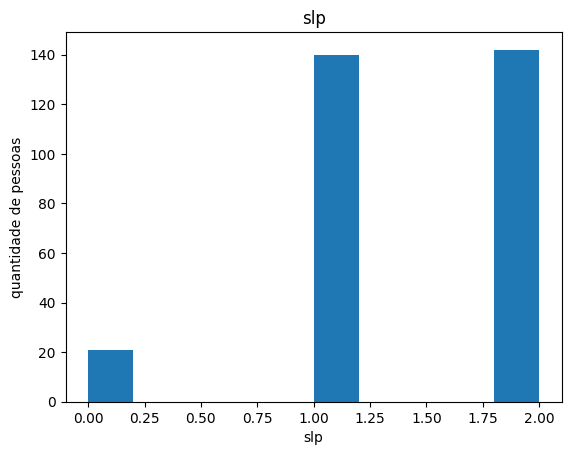

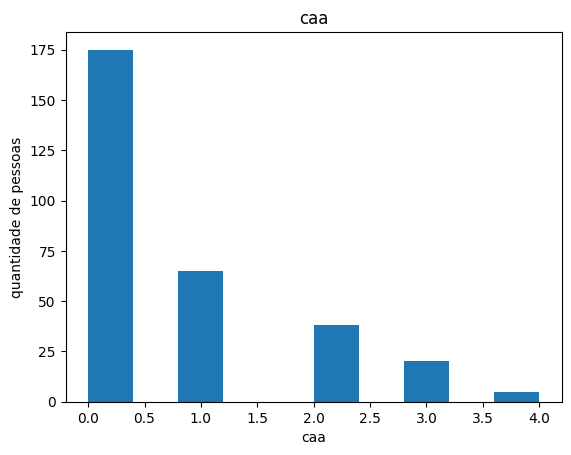

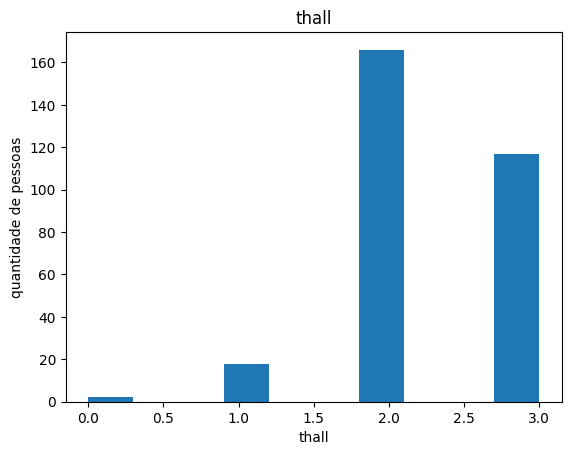

In [ ]:
for col in (df.columns[:-1]):
  plt.hist(df[col])
  plt.xlabel(col)
  plt.ylabel("quantidade de pessoas")
  plt.title(col)
  plt.show()

Analisando a distribuição dos dados de entrada, não evidenciamos grandes problemas relacionados a outliers. Pularemos a etapa de eliminação de outliers e seguiremos a análise.

Análise de distribuição da coluna target:


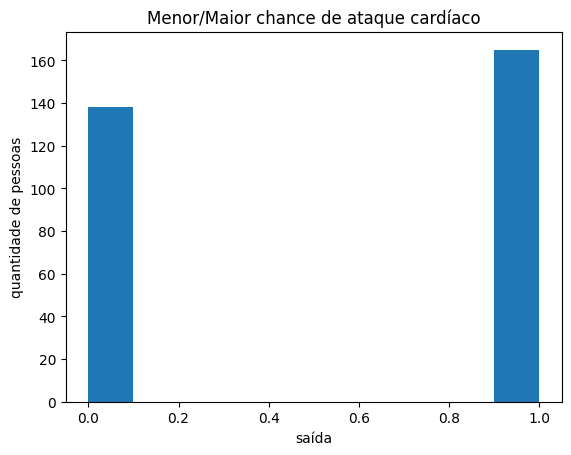

In [ ]:
  plt.hist(df["output"])
  plt.xlabel("saída")
  plt.ylabel("quantidade de pessoas")
  plt.title("Menor/Maior chance de ataque cardíaco")
  plt.show()

As classes estão balanceadas. Não é necessário fazer ajuste de balanceamento.

## 2. Experimentos com os dados iniciais

Separação do dataset em treino e teste:

In [ ]:
X = df.iloc[:,0:13] # atributos
y = df.iloc[:,13] # classe (target)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=7) # faz a divisão


In [ ]:
num_particoes = [5,10,15,20] # número de folds da validação cruzada
# Listas para armazenar os modelos, os resultados e os nomes dos modelos
models = []
initialResults = []
names = []

# Modelagem
# Definindo uma seed global para esta célula de código
def runModels(results):
  np.random.seed(7)

  # Listas para armazenar os modelos, os resultados e os nomes dos modelos
  models = []

  # Preparando os modelos e adicionando-os em uma lista
  models.append(('KNN', KNeighborsClassifier()))
  models.append(('CART', DecisionTreeClassifier()))
  models.append(('NB', GaussianNB()))
  models.append(('SVM', SVC()))

  # Avaliando modelos e folds
  for num in num_particoes:
    print("\n",num, " folds")
    kfold_results = []
    for name, model in models:
      kfold = KFold(n_splits=num, shuffle=True, random_state=7)
      cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
      kfold_results.append((cv_results))
      if(len(names)<len(models)):
        names.append(name)
      msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std()) # média e desvio padrão dos resultados da validação cruzada
      print(msg)

    results.append((num,kfold_results))

runModels(initialResults)


 5  folds
KNN: 0.644898 (0.084466)
CART: 0.777381 (0.075208)
NB: 0.822364 (0.077362)
SVM: 0.628316 (0.093996)

 10  folds
KNN: 0.645167 (0.078104)
CART: 0.781333 (0.086006)
NB: 0.830333 (0.082525)
SVM: 0.636667 (0.090627)

 15  folds
KNN: 0.645833 (0.128874)
CART: 0.810294 (0.095794)
NB: 0.818627 (0.096859)
SVM: 0.641176 (0.128777)

 20  folds
KNN: 0.637500 (0.137417)
CART: 0.777885 (0.101806)
NB: 0.830769 (0.120768)
SVM: 0.662179 (0.125682)


O método Naive Bayes com 10 folds alcançou métricas de acurácia entre as maiores, e  dentre os menores valores para desvio padrão. Parece mais interessante para ser o modelo selecionado até o momento.

Interessante que na avaliação com 15 folds, a acurácia e desvio padrão dos métodos CART e NB ficaram semelhantes. Se apenas este valor de fold fosse testado, poderia levar a uma decisão diferente para o algoritmo selecionado.

Analisando os outros modelos, o KNN e SVM apresentam acurácia inferior, provavelmente por conta da falta de normalização dos dados.

## 3. Transformações do dataset

### 3.1 Experimentos com dados normalizados

Vamos executar o mesmo teste, porém para o dataset normalizado, para avaliar se a acurácia pode melhorar.

In [ ]:
values = df.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
values_scaled = min_max_scaler.fit_transform(values)
df_minmax = pd.DataFrame(values_scaled)
df_minmax.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0.708333,1.0,1.000000,0.481132,0.244292,1.0,0.0,0.603053,0.0,0.370968,0.0,0.0,0.333333,1.0
1,0.166667,1.0,0.666667,0.339623,0.283105,0.0,0.5,0.885496,0.0,0.564516,0.0,0.0,0.666667,1.0
2,0.250000,0.0,0.333333,0.339623,0.178082,0.0,0.0,0.770992,0.0,0.225806,1.0,0.0,0.666667,1.0
3,0.562500,1.0,0.333333,0.245283,0.251142,0.0,0.5,0.816794,0.0,0.129032,1.0,0.0,0.666667,1.0
4,0.583333,0.0,0.000000,0.245283,0.520548,0.0,0.5,0.702290,1.0,0.096774,1.0,0.0,0.666667,1.0


In [ ]:
X = df_minmax.iloc[:,0:13] # atributos
y = df_minmax.iloc[:,13] # classe (target)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=7) # faz a divisão

In [ ]:
minmaxResults = []
runModels(minmaxResults)


 5  folds
KNN: 0.801531 (0.049019)
CART: 0.773214 (0.072522)
NB: 0.822364 (0.077362)
SVM: 0.805697 (0.067963)

 10  folds
KNN: 0.797333 (0.100571)
CART: 0.781333 (0.086006)
NB: 0.830333 (0.082525)
SVM: 0.838833 (0.091969)

 15  folds
KNN: 0.789461 (0.098031)
CART: 0.814461 (0.097149)
NB: 0.818627 (0.096859)
SVM: 0.839216 (0.092527)

 20  folds
KNN: 0.797756 (0.109040)
CART: 0.777885 (0.101806)
NB: 0.830769 (0.120768)
SVM: 0.842949 (0.101183)


A acurácia dos modelos KNN e SVM melhoraram consideravelmente com a normalização dos dados. Inclusive, o SVM alcançou a maior acurácia do experimento com 20 folds, tornando-se um bom candidato para modelo selecionado.

### 3.2 Experimentos com dados Padronizados

In [ ]:
values = df.values #returns a numpy array
standard_scaler = preprocessing.StandardScaler()
values_scaled = min_max_scaler.fit_transform(values)
df_standard = pd.DataFrame(values_scaled)
df_standard.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0.708333,1.0,1.000000,0.481132,0.244292,1.0,0.0,0.603053,0.0,0.370968,0.0,0.0,0.333333,1.0
1,0.166667,1.0,0.666667,0.339623,0.283105,0.0,0.5,0.885496,0.0,0.564516,0.0,0.0,0.666667,1.0
2,0.250000,0.0,0.333333,0.339623,0.178082,0.0,0.0,0.770992,0.0,0.225806,1.0,0.0,0.666667,1.0
3,0.562500,1.0,0.333333,0.245283,0.251142,0.0,0.5,0.816794,0.0,0.129032,1.0,0.0,0.666667,1.0
4,0.583333,0.0,0.000000,0.245283,0.520548,0.0,0.5,0.702290,1.0,0.096774,1.0,0.0,0.666667,1.0


In [ ]:
X = df_standard.iloc[:,0:13] # atributos
y = df_standard.iloc[:,13] # classe (target)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=7) # faz a divisão

In [ ]:
standardResults = []
runModels(standardResults)


 5  folds
KNN: 0.801531 (0.049019)
CART: 0.773214 (0.072522)
NB: 0.822364 (0.077362)
SVM: 0.805697 (0.067963)

 10  folds
KNN: 0.797333 (0.100571)
CART: 0.781333 (0.086006)
NB: 0.830333 (0.082525)
SVM: 0.838833 (0.091969)

 15  folds
KNN: 0.789461 (0.098031)
CART: 0.814461 (0.097149)
NB: 0.818627 (0.096859)
SVM: 0.839216 (0.092527)

 20  folds
KNN: 0.797756 (0.109040)
CART: 0.777885 (0.101806)
NB: 0.830769 (0.120768)
SVM: 0.842949 (0.101183)


Podemos observar que a normalização e padronização tiveram os mesmos efeitos sobre os resultados dos modelos.  

In [ ]:
# Boxplot de comparação dos modelos
#Comparação da Acurácia dos Modelos :
def showPlots(title,results):
  fig, ax = plt.subplots(nrows=1, ncols=4, figsize=(12, 4))
  fig.tight_layout(pad=3)
  for i in range(len(num_particoes)):
    #fig = plt.figure()
    ax[i].set(title=''+str(num_particoes[i]) + ' folds')
    #ax = fig.add_subplot(111)
    ax[i].boxplot(results[i][1])
    ax[i].set_xticklabels(names)

  plt.show()

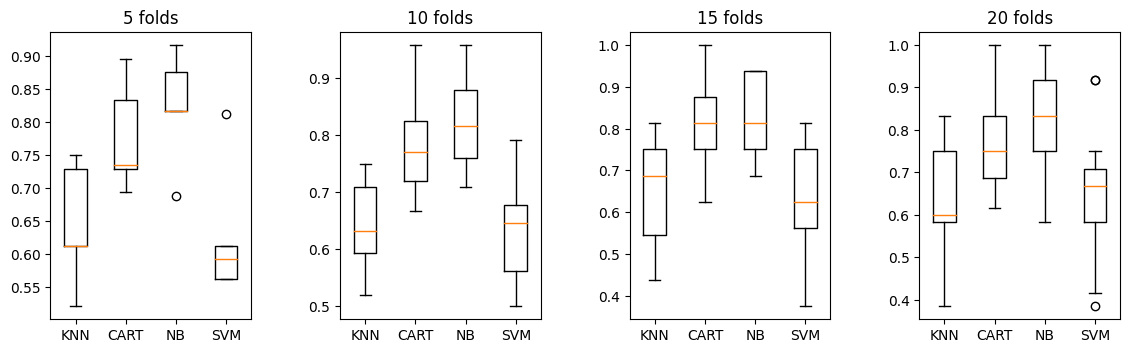

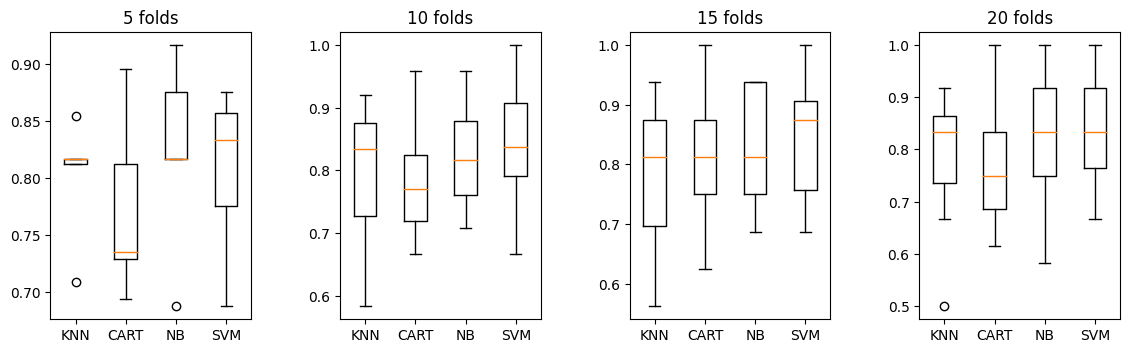

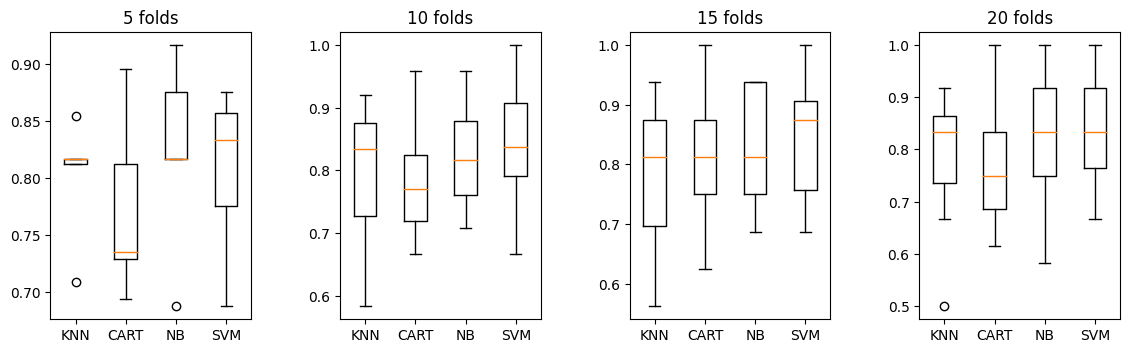

In [ ]:
showPlots("Initial",initialResults)
showPlots("MinMax",minmaxResults)
showPlots("Standard",standardResults)

Podemos visualizar graficamente o efeito da normalização e padronização nos resultados, principalmente nos algoritmos KNN e SVM.

Vamos selecionar o dataset normalizado para seguir.

In [ ]:
X = df_minmax.iloc[:,0:13] # atributos
y = df_minmax.iloc[:,13] # classe (target)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=7) # faz a divisão

## 4. Feature Selection
Vamos avaliar agora a importância dos atributos.

In [ ]:
best_var = SelectKBest(score_func=f_classif, k=11)
fit = best_var.fit(X, y)

df_atributos = pd.DataFrame()
df_atributos['Scores'] = pd.DataFrame(fit.scores_)
df_atributos['Atributes']= df.columns[0:13]
df_atributos.sort_values(by=['Scores'],ascending=False)

,Scores,Atributes
8,70.952438,exng
2,69.772271,cp
9,68.551439,oldpeak
7,65.120104,thalachh
11,54.559834,caa
10,40.902071,slp
12,40.407696,thall
1,25.792191,sex
0,16.116700,age
3,6.458169,trtbps


Podemos observar que os atributos "chol - colesterol" e "fbs - açúcar no sangue em jejum " não são tão relevantes para o modelo selecionado.

Já o atributo "exng - angina induzida por exercício" se mostrou o mais importante para a determinação de risco de ataque cardíaco.

Em segundo temos o atributo "cp - tipo de dor no peito". Uma vez que ele se mostrou um dado importante, em uma análise mais profunda seria interessante considerar que categorização pode não ser sequencial, ou seja, a categoria 4 não é necessariamente mais grave do que as anteriores. Neste caso, poderíamos utilizar a modelagem utilizando "one-hot encoding".

É interessante observar também que as informações "sex - sexo do paciente" e "age - idade do paciente" ficaram com baixos escores de importância em relação a outros atributos, indicando que não são tão relevantes para determinar risco de ataque cardíaco.

## 5. Selecionando o modelo

In [ ]:
X = df.iloc[:,0:13] # atributos
y = df.iloc[:,13] # classe (target)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=7) # faz a divisão

Analisando os candidatos melhores

In [ ]:
# Criando um modelo com todo o conjunto de treino
pipe = Pipeline([('scaler', MinMaxScaler()), ('svc', SVC())])
pipe.fit(X_train, y_train)
Pipeline(steps=[('scaler', MinMaxScaler()), ('svc', SVC())])
pipe.score(X_test, y_test)

0.7540983606557377

In [ ]:
# Criando um modelo com todo o conjunto de treino
pipe = Pipeline([('scaler', MinMaxScaler()), ('svc', GaussianNB())])
pipe.fit(X_train, y_train)
Pipeline(steps=[('scaler', MinMaxScaler()), ('svc', GaussianNB())])
pipe.score(X_test, y_test)

0.7868852459016393

Dada a acurácia dos modelos candidatos no conjunto de teste, o modelo selecionado: GaussianNB.

Agora será realizada a seleção de features para avaliação dos resultados no modelo selecionado.

In [ ]:
print('Antes',X.shape)
features_X = fit.transform(X)
print('Depois',features_X.shape)

X_train, X_test, y_train, y_test = train_test_split(features_X, y, test_size=0.20, random_state=7) # faz a divisão

Antes (303, 13)
Depois (303, 11)


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but SelectKBest was fitted without feature names
  warnings.warn(


In [ ]:
# Criando um modelo com todo o conjunto de treino
pipe = Pipeline([('scaler', MinMaxScaler()), ('svc', GaussianNB())])
pipe.fit(X_train, y_train)
Pipeline(steps=[('scaler', MinMaxScaler()), ('svc', GaussianNB())])
pipe.score(X_test, y_test)



0.7868852459016393

Podemos observar que a remoção das duas features menos importantes não influenciou na acurácia do modelo.

In [ ]:
predictions = pipe.predict(X_test)

Text(0.5, 1.0, 'Matriz de confusão')

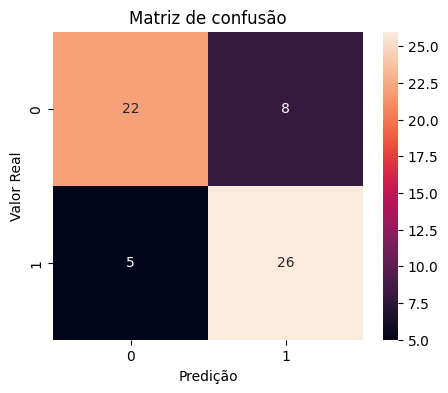

In [ ]:
plt.figure(figsize=(5,4))
sns.heatmap(confusion_matrix(y_test,predictions),annot=True)
plt.xlabel('Predição')
plt.ylabel('Valor Real')
plt.title('Matriz de confusão')

Podemos concluir que o Naive Bayes é um bom modelo para prever o risco de ataque cardíaco.